<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
from pprint import pprint
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pylab import *
import keyword

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# sat.set_index('State').T.to_dict('list')
with open('sat_scores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

d = {}

for n in range(4):
    for key in data[0]:
#         seq[start:end:step]
        d[key] = [row[n] for row in data[1::]]
pprint(d)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '49

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
sat = pd.read_csv('sat_scores.csv')

In [4]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
sat_data_dict = {'column_names':['State','Rate','Verbal','Math'],
                  'data_type':['string','integer','integer','integer'],
                  'description':['2 letter state code',
                                 'Participation rate of students for SAT test',
                                 'Average score of verbal section',
                                 'Average score of maths section'],
                  'shape':'52 rows by 4 columns'
                 }
sat_data_dict


{'column_names': ['State', 'Rate', 'Verbal', 'Math'],
 'data_type': ['string', 'integer', 'integer', 'integer'],
 'description': ['2 letter state code',
  'Participation rate of students for SAT test',
  'Average score of verbal section',
  'Average score of maths section'],
 'shape': '52 rows by 4 columns'}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/hitomihoshino/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


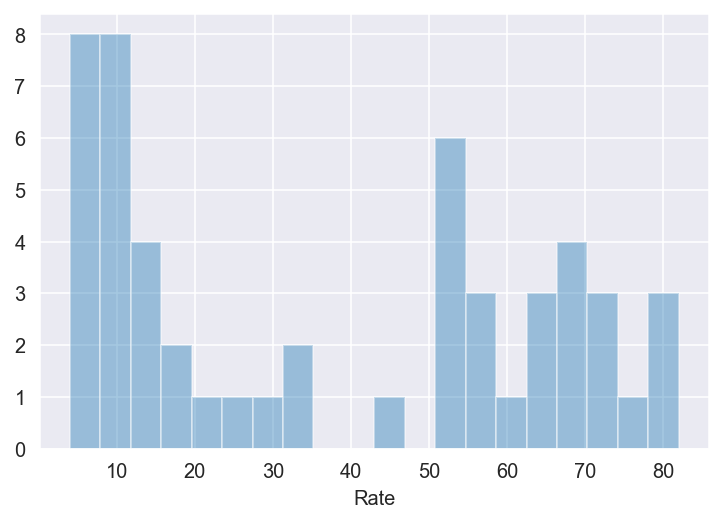

In [7]:
sns.set_style(style = 'darkgrid')# white, dark, whitegrid, darkgrid, ticks
sns.distplot(sat['Rate'],bins=20,kde=False)
plt.show()

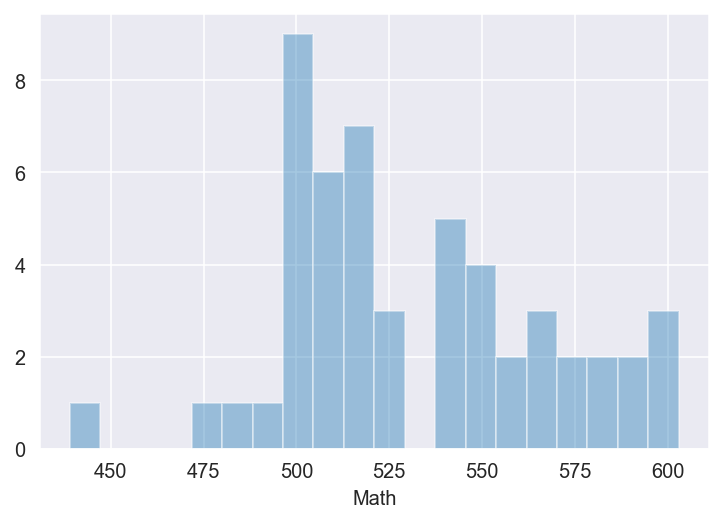

In [8]:
sns.set_style(style = 'darkgrid')
sns.distplot(sat['Math'],bins=20,kde=False)
plt.show()

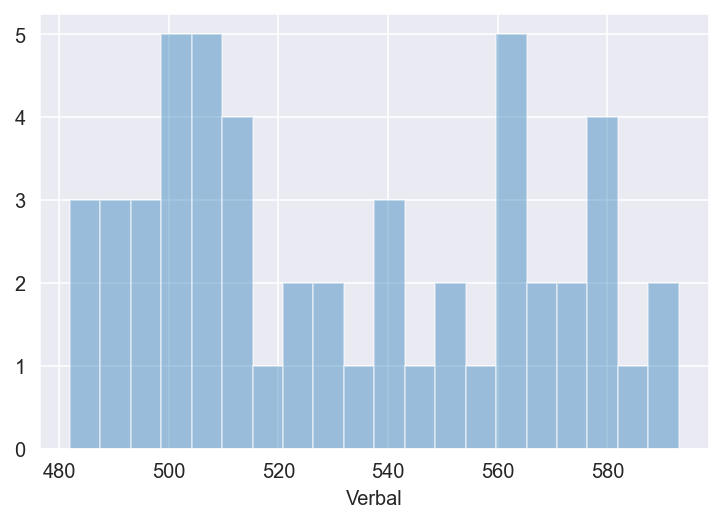

In [9]:
sns.set_style(style = 'darkgrid')
sns.distplot(sat['Verbal'],bins=20,kde=False)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

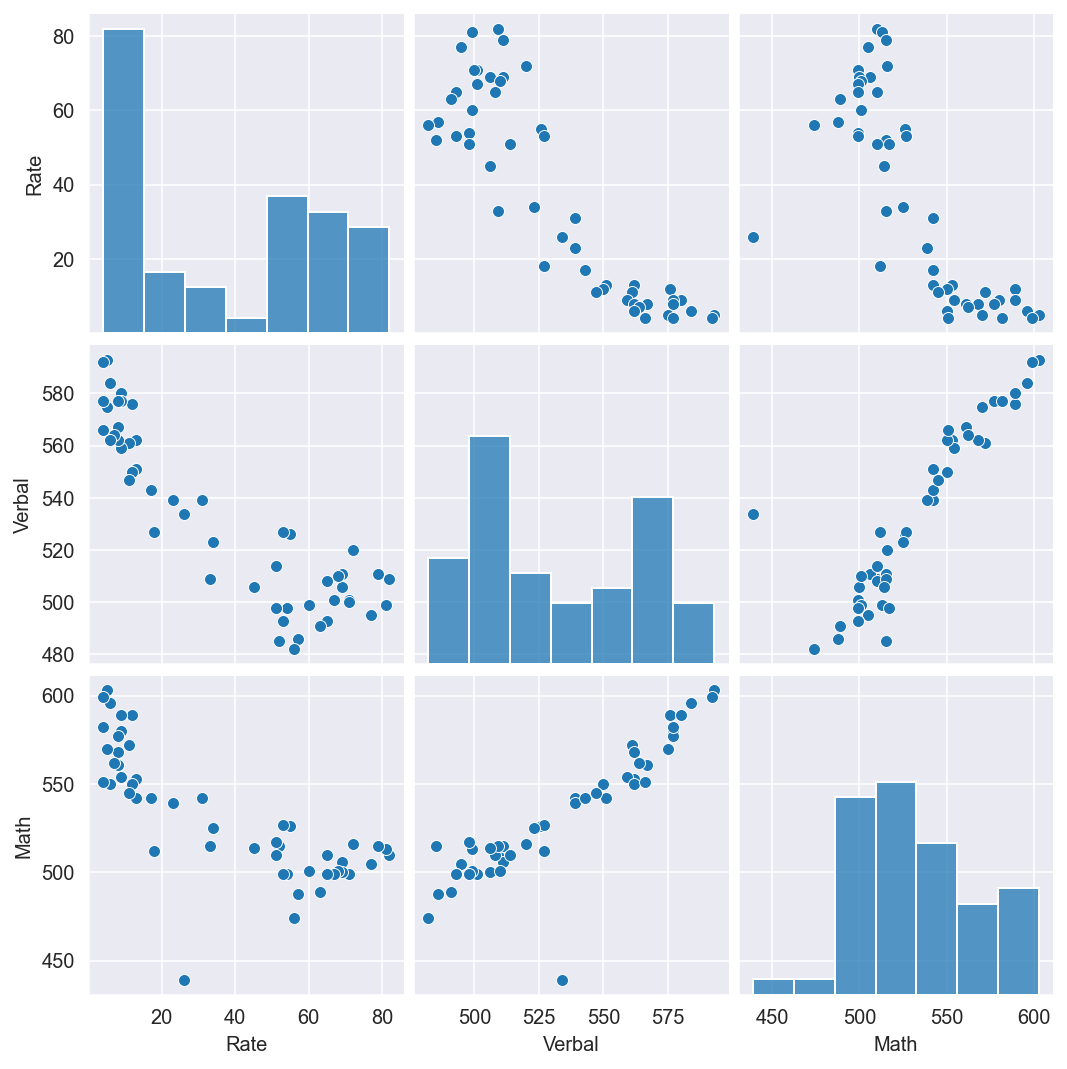

In [10]:
sns.pairplot(sat)
# (hue='State')
plt.show()


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<AxesSubplot:ylabel='Frequency'>

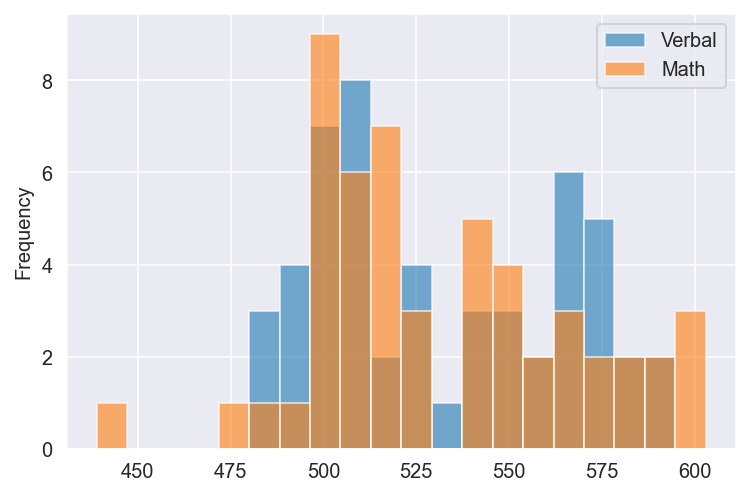

In [11]:
# # Method1
# sat['Math'].plot.hist(stacked=True)
# sat['Verbal'].plot.hist(stacked=True)

#Method2
sat[['Verbal','Math']].plot.hist(alpha=0.6, bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

<AxesSubplot:>

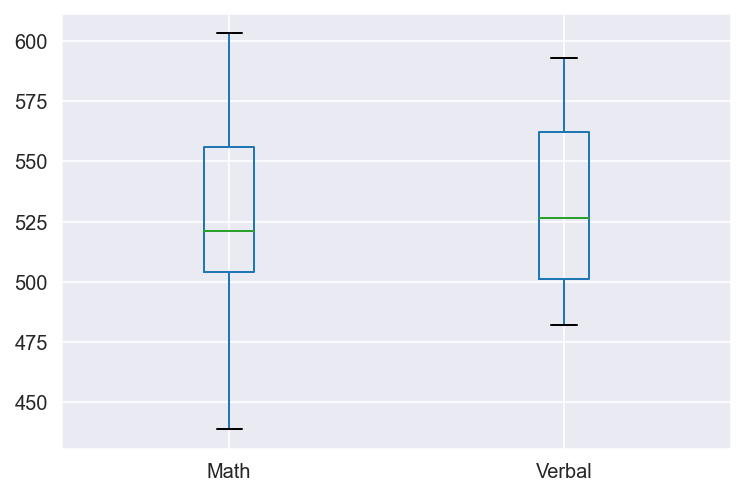

In [12]:
sat.plot.box(y=['Math','Verbal'])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<AxesSubplot:>

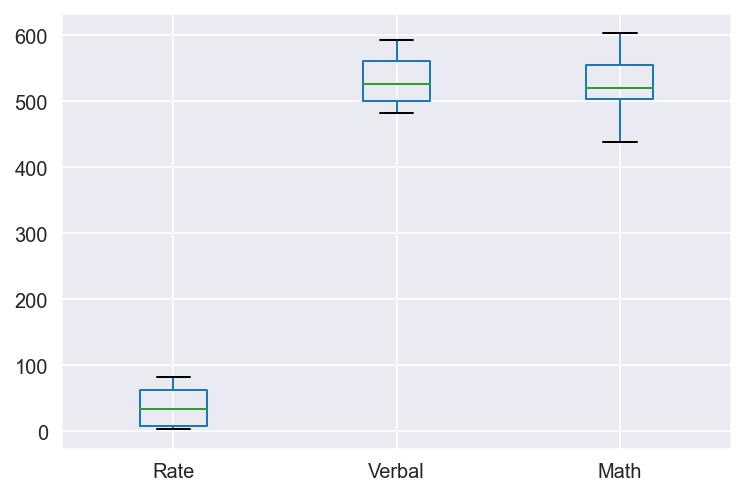

In [13]:
sat.plot.box()

In [14]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [15]:
sat_stand = var_standardized(sat[['Rate', 'Verbal', 'Math']])

<AxesSubplot:>

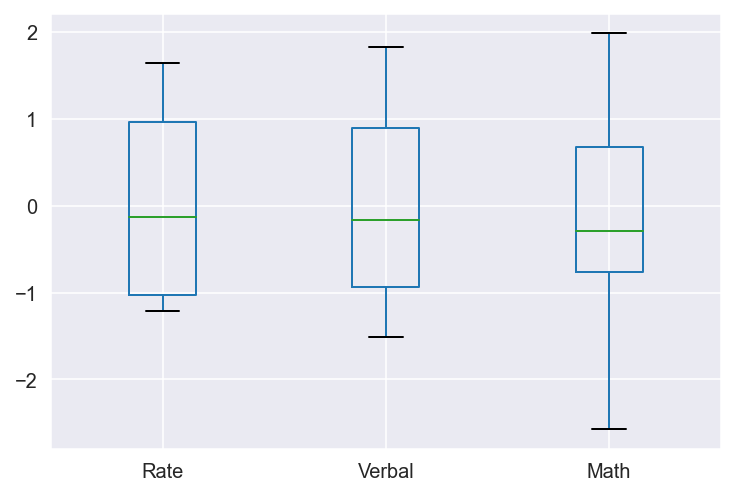

In [16]:
sat_stand.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
v_mean = sat['Verbal'].mean()
v_mean #532.0192307692307
v_high_mean = sat[['State','Verbal']][sat['Verbal']> v_mean]
print(list(v_high_mean['State']))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
v_med = sat['Verbal'].median()
v_med #526.5
v_high_med = sat[['State','Verbal']][sat['Verbal']> v_mean]
print(list(v_high_med['State']))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
sat['Verbal - Math'] = sat['Verbal']-sat['Math']
sat.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
greatest_gap = sat.sort_values('Verbal - Math', ascending=False).head(10)
greatest_gap

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [21]:
lowest_gap = sat.sort_values('Verbal - Math', ascending=True).head(10)
lowest_gap

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
# # NOTE:
# use df.corr()
# use drop()
# axis0 for vertical (row)
# axis1 for horisontal (col)

sat_corr = sat.drop(['State'], axis = 1) #inplace? 
sat_corr = sat.corr()
sat_corr

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


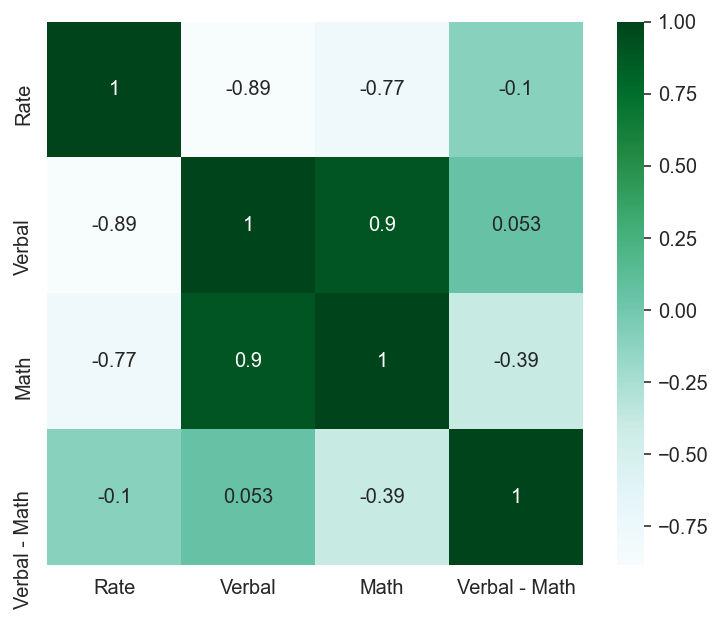

In [23]:
# annot is annotation
plt.figure(figsize=(6, 5))
# plt.yticks(rotation=0)
sns.heatmap(sat_corr, annot=True, cmap="BuGn")

# cmap="YlGnBu"

# sns.heatmap(sat_corr, annot=True, vmin=None, vmax=None, cmap=None, center=None, robust=False,
#                 fmt='.2g', annot_kws=None, linewidths=0,
#                 linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None,
#                 square=False, ax=None, xticklabels=True, yticklabels=True,
#                 mask=None)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [24]:
sat.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [25]:
# Covariance indicates the direction of the linear relationship between variables.
# use cov()
sat_cov = sat.cov()
sat_cov

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


   ### 🚀Question6 Summaries
Describe how the covariance matrix is different from the correlation matrix.
- Covariance indicates the direction of the linear relationship between variables.
    - if +: LR is positive, 0: No LR, -: LR is negative
- Correlation measures both the strength and direction of the linear relationship between two variables.
What is the process to convert the covariance into the correlation?
- 1. We can write a mathematical function to process to convert the covariance into the correlation by the mathematical definition
- 2. We can use .corr() / .cov() methods
Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
- While covariance matrix can only indicate the direction of LR, correlation can not only indicate the direction of LR but also that of the strength(how fast/slow the rate of the change is)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [26]:
drug = pd.read_csv('drug-use-by-age.csv')

In [27]:
drug.shape

(17, 28)

In [28]:
drug.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [29]:
drug.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [30]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [31]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [32]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [33]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [34]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

There is no NaN in the drug dataset....
- 
⭐️**However**
- #'-' is in the data

In [35]:
# functio that can print unique values of any columns
def find_unique_values(col):
    index = 1
    for col in drug:
        print(index, drug[col].unique())
        index += 1


find_unique_values(0)    

#'-' is in the data

1 ['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
2 [2798 2757 2792 2956 3058 3038 2469 2223 2271 2354 4707 4591 2628 2864
 7391 3923 2448]
3 [ 3.9  8.5 18.1 29.2 40.1 49.3 58.7 64.6 69.7 83.2 84.2 83.1 80.7 77.5
 75.  67.2]
4 [ 3.  6.  5. 10. 13. 24. 36. 48. 52.]
5 [ 1.1  3.4  8.7 14.5 22.5 28.  33.7 33.4 34.  33.  28.4 24.9 20.8 16.4
 10.4  7.3  1.2]
6 [ 4. 15. 24. 25. 30. 36. 52. 60. 72. 48.]
7 [0.1 0.5 1.  2.  3.2 4.1 4.9 4.8 4.5 4.  2.1 1.5 0.9 0. ]
8 ['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
9 [0.  0.1 0.4 0.5 0.6]
10 ['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']
11 [0.1 0.  0.2 0.4 0.5 0.9 0.6 1.1 0.7]
12 ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
13 [0.2 0.6 1.6 2.1 3.4 4.8 7.  8.6 7.4 6.3 5.2 4.5 3.2 1.8 0.3 0.1]
14 [52.  6.  3.  4.  2. 44.]
15 [1.6 2.5 2.6 3.  2.  1.8 1.4 1.5 1.  0.8 

In [36]:
# convert all '-'s in the dataframe to NaN 
drug.applymap(lambda x: np.nan if x == '-' else x)

# drug.fillna(drug.loc[8].mean(), inplace=True)
# drug['cocaine-frequency'].fillna(drug['cocaine-frequency'].mean(), inplace = True)
# drug['cocaine-frequency'].mean()
# drug['cocaine-frequency']=drug['cocaine-frequency'].astype(int)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [37]:
# clean all NaN to 0
needs_clean = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency',
            'oxycontin-frequency', 'meth-frequency']

# changing in order... '-' > NaN > 0
for label in needs_clean:

    drug.loc[drug[label]=='-', label] = 0. #drug[label].mean()
#     drug.loc[drug[label]=='-', label] = drug[label].mean()
    drug[label] = pd.to_numeric(drug[label], downcast='float')

😊**Cleaned!!!**

In [38]:
# check
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     float32
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     float32
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     float32
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

### 7.2 Do a high-level, initial overview of the data
Great website: https://www.mygreatlearning.com/blog/covariance-vs-correlation/

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

**⭐️Separate the drug database into two parts**
1. drug_use: list of the percentage of drug users per age group
2. drug_freq: list of the frequency of how often drug user used each drug in the past 12 months

In [39]:
# # create 
# drug_use
drug_use_list = [x for x in list(drug.columns) if '-frequency' not in x]
drug_use = drug.loc[:, drug_use_list]
drug_use.columns

Index(['age', 'n', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use',
       'sedative-use'],
      dtype='object')

In [40]:
# # create 
# drug_freq
drug_freq_list = [x for x in list(drug.columns) if '-use' not in x]
drug_freq = drug.loc[:, drug_freq_list]
drug_freq.columns

Index(['age', 'n', 'alcohol-frequency', 'marijuana-frequency',
       'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
       'hallucinogen-frequency', 'inhalant-frequency',
       'pain-releiver-frequency', 'oxycontin-frequency',
       'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency',
       'sedative-frequency'],
      dtype='object')

### Part1: Analysis of Drug Users

In [41]:
# round the number of drug users to the nearest whole number
for col in drug_use.columns:
    if 'use' in col:
        drug_use[col] = np.round((drug_use[col]/100. * drug_use['n']), decimals=0)

In [42]:
# drop n because it's invaluable
drug_use.drop(columns='n', inplace = True)

<AxesSubplot:title={'center':'# Sedative users'}>

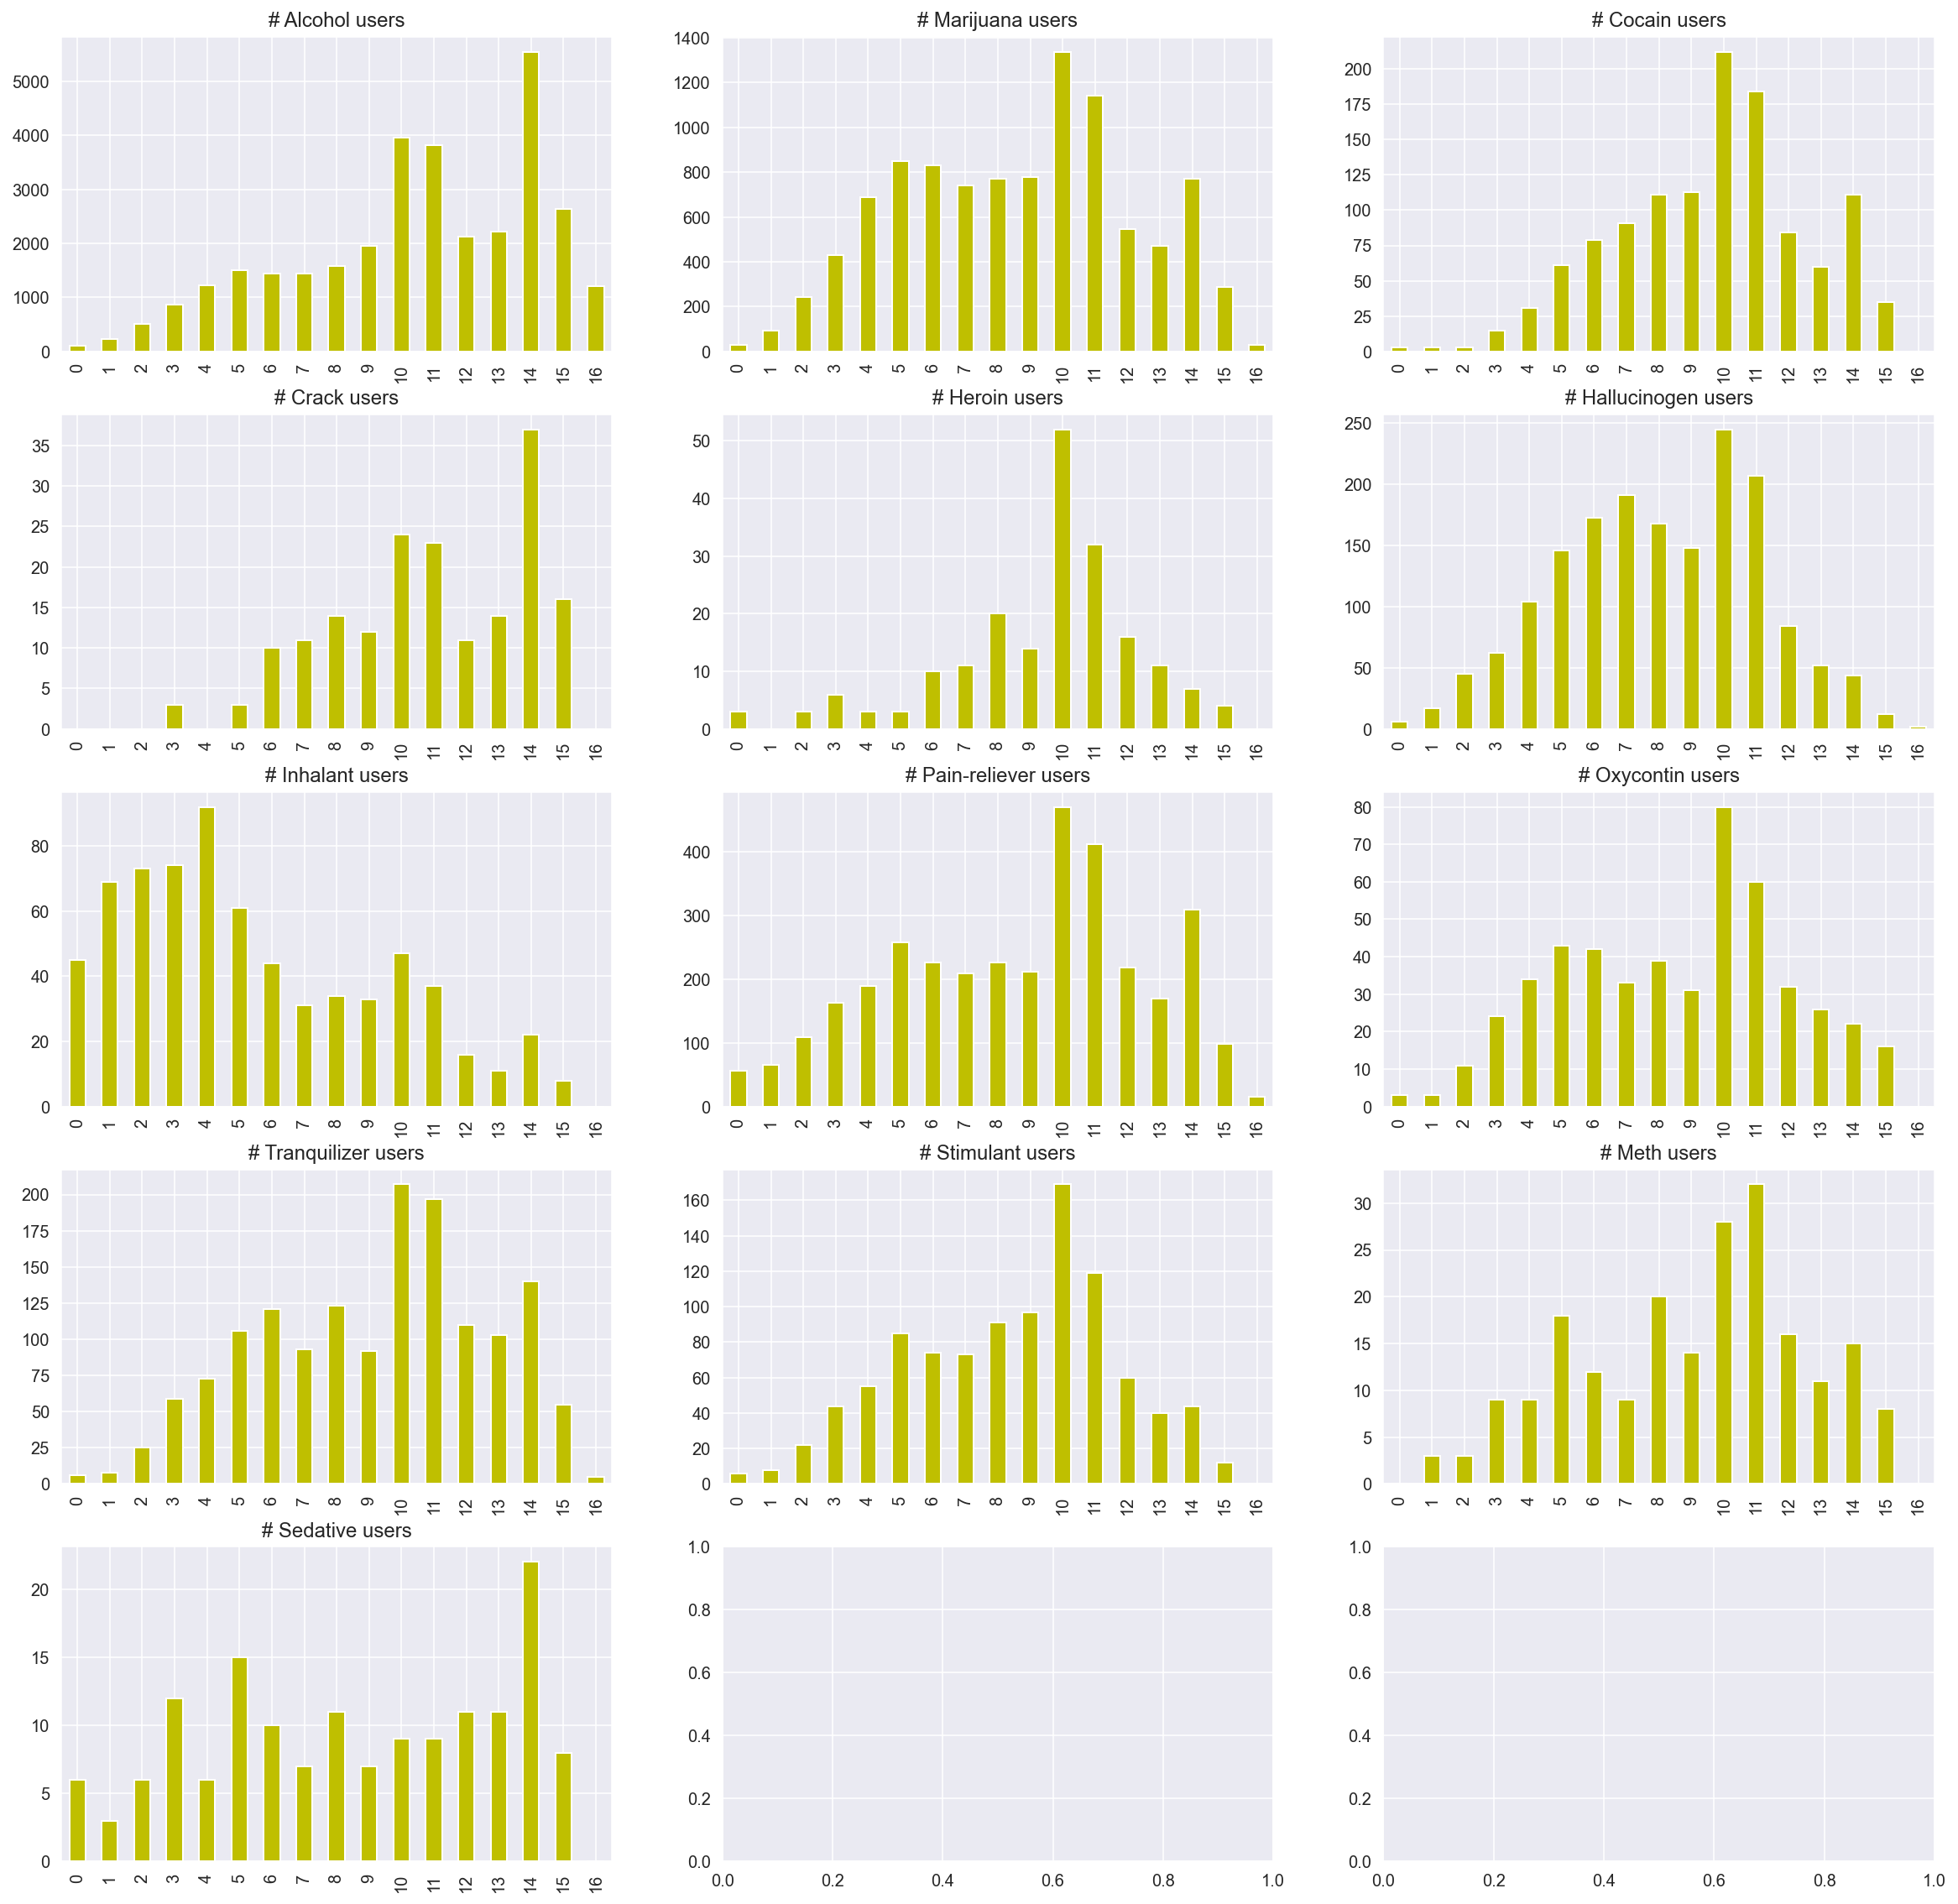

In [43]:
# x-axis index is based on the category of ages

fig, ax = plt.subplots(5,3, figsize=(20,20))
drug_use['alcohol-use'].plot(kind='bar', color='y', ax=ax[0][0], title='# Alcohol users')
drug_use['marijuana-use'].plot(kind='bar', color='y', ax=ax[0][1], title='# Marijuana users')
drug_use['cocaine-use'].plot(kind='bar', color='y', ax=ax[0][2], title='# Cocain users')
drug_use['crack-use'].plot(kind='bar', color='y', ax=ax[1][0], title='# Crack users')
drug_use['heroin-use'].plot(kind='bar', color='y', ax=ax[1][1], title='# Heroin users')
drug_use['hallucinogen-use'].plot(kind='bar', color='y', ax=ax[1][2], title='# Hallucinogen users')
drug_use['inhalant-use'].plot(kind='bar', color='y', ax=ax[2][0], title='# Inhalant users')
drug_use['pain-releiver-use'].plot(kind='bar', color='y', ax=ax[2][1], title='# Pain-reliever users')
drug_use['oxycontin-use'].plot(kind='bar', color='y', ax=ax[2][2], title='# Oxycontin users')
drug_use['tranquilizer-use'].plot(kind='bar', color='y', ax=ax[3][0], title='# Tranquilizer users')
drug_use['stimulant-use'].plot(kind='bar', color='y', ax=ax[3][1], title='# Stimulant users')
drug_use['meth-use'].plot(kind='bar', color='y', ax=ax[3][2], title='# Meth users')
drug_use['sedative-use'].plot(kind='bar', color='y', ax=ax[4][0], title='# Sedative users')

### 🔎Observation
age-groups '22-23' and '24-25' have the highest numbers of drug users in 9 out of 13 categories

👽**The study in drug users and those of correlations**

In [44]:
drug_use_corr=drug_use.corr()

<AxesSubplot:>

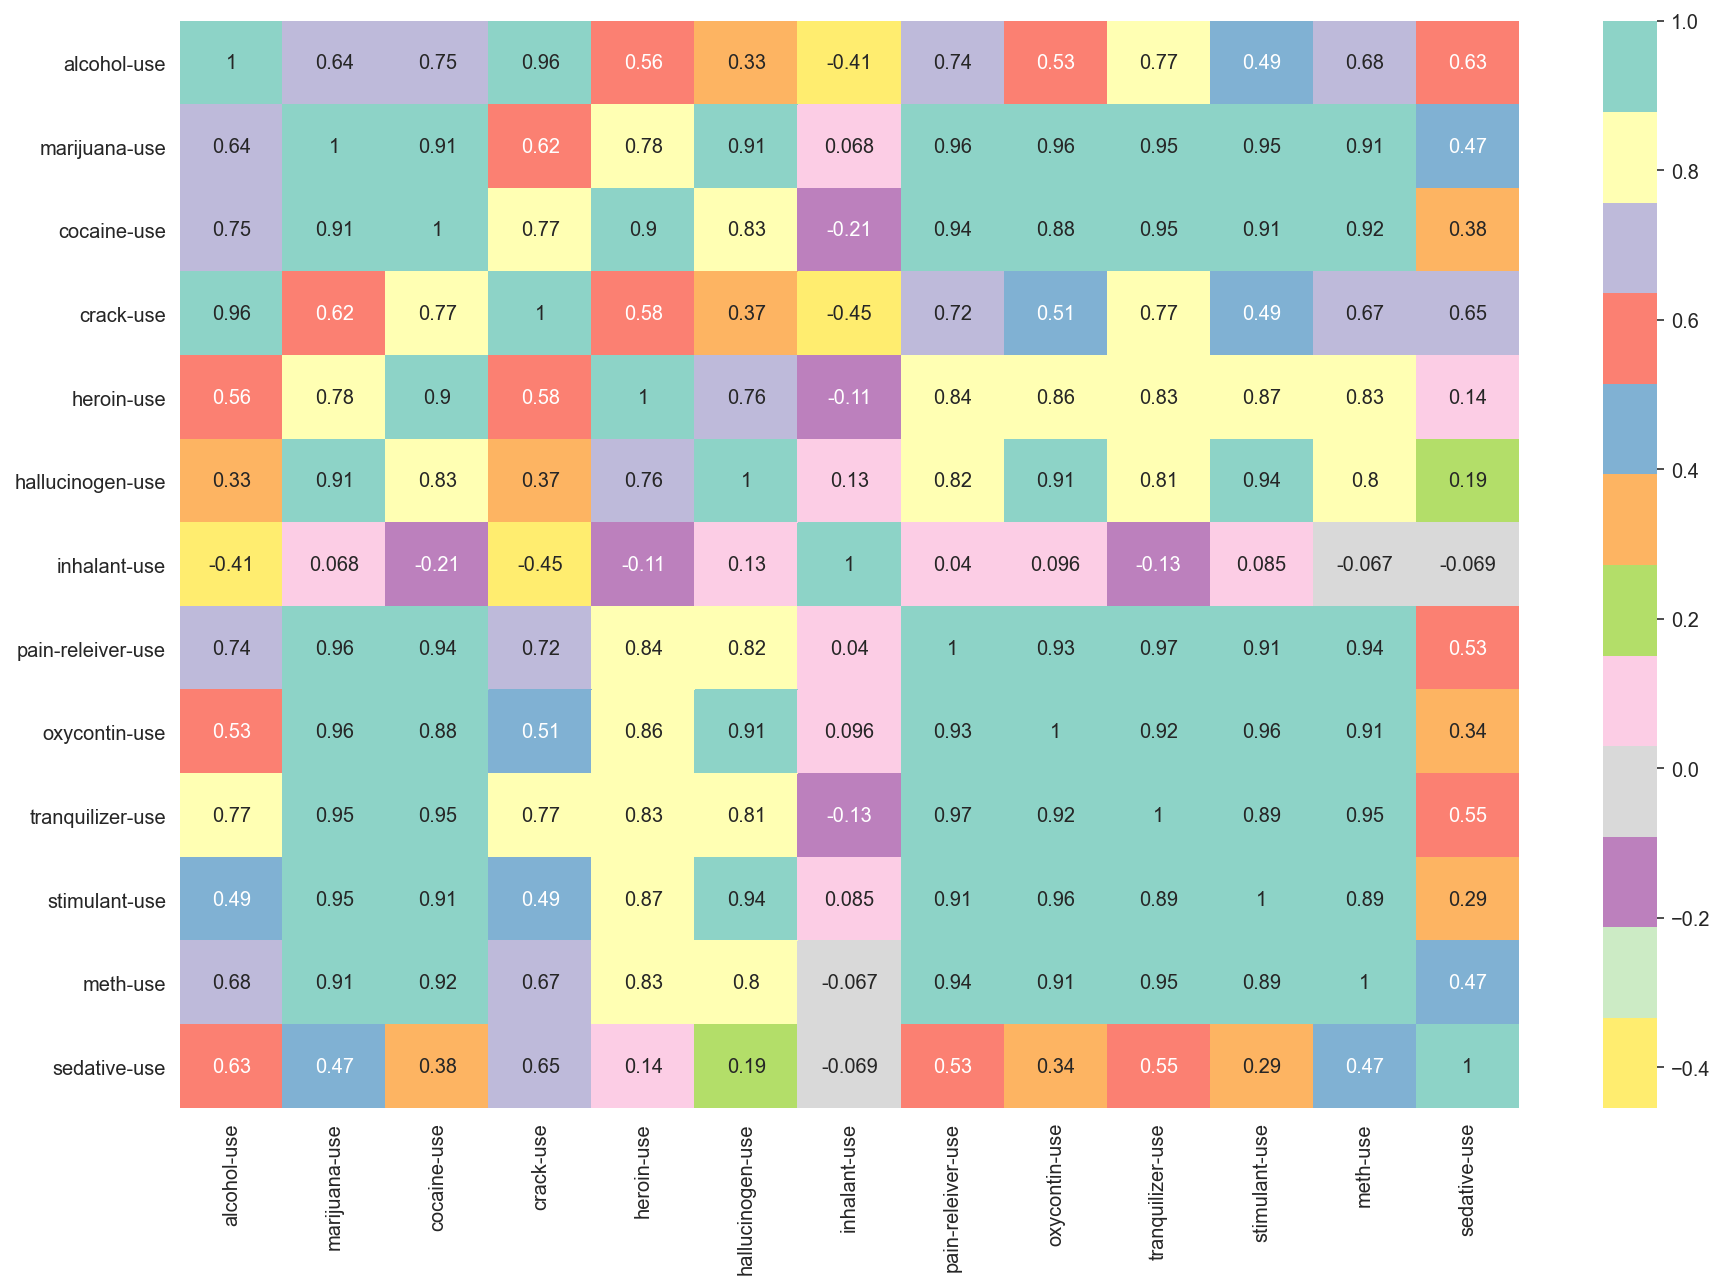

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(drug_use_corr, annot=True, cmap="Set3_r")

### 🔎Observation
**Remarks 
- marijuana, cocaine, pain-reliever, oxyxontin, tranquizer, stimulant, and meth have high positive correlations of uses along with other drugs. 
- On the other hand, correlated uses of Crack, Alcohol, Sedactive, inhalant is not very positive

### Part1: Analysis of the frequency of drug uses among drug users

In [46]:
# drop n because it's invaluable
drug_freq.drop(columns='n', inplace = True)

In [47]:
drug_freq.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


👽**The study in drug frequency correlations**

In [48]:
drug_freq_corr=drug_freq.corr()

<AxesSubplot:>

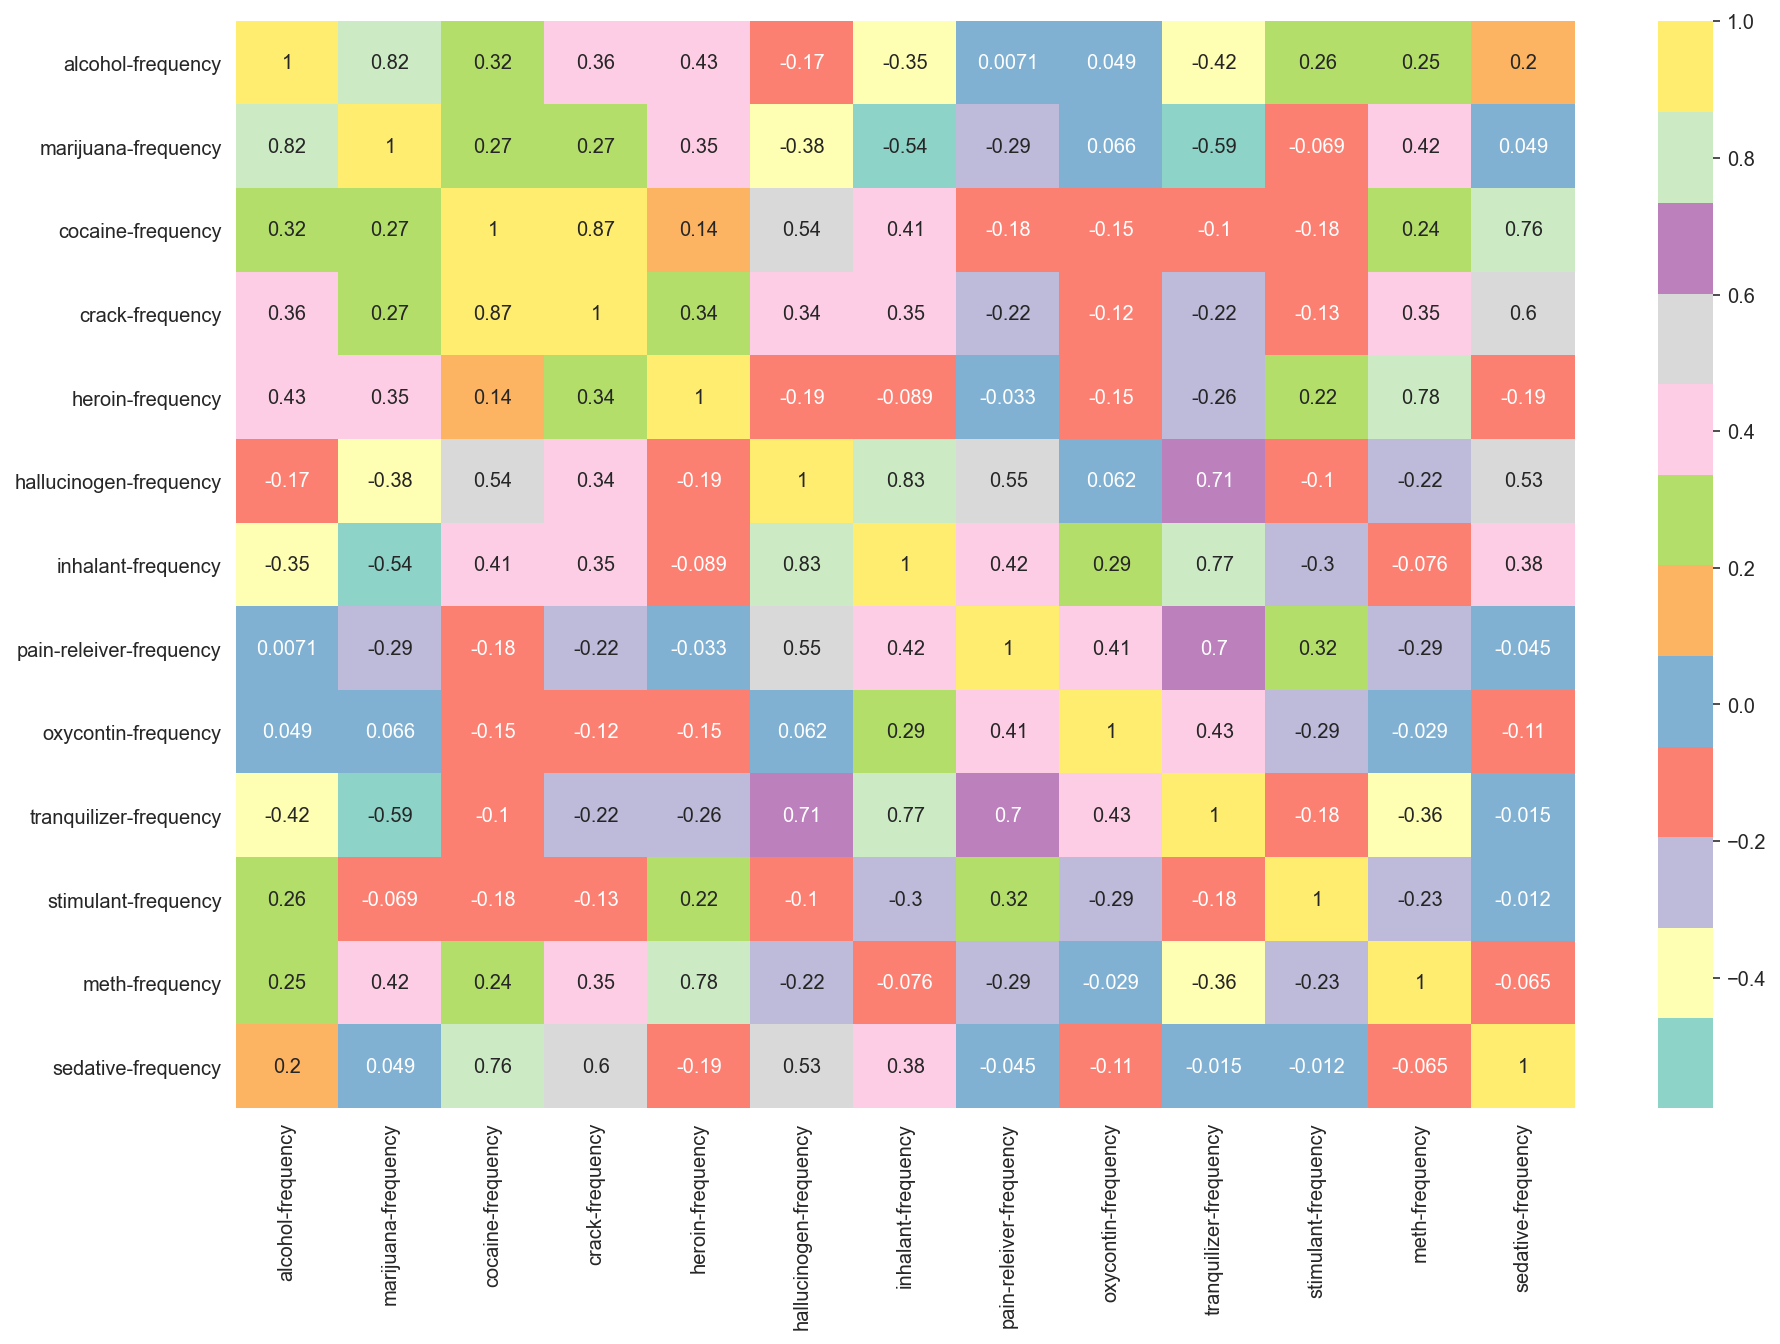

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(drug_freq_corr, annot=True, cmap="Set3")

### 🔎Observations
- the frequency pf correlations in uses of crack x cocaine is the highest
- alcohol x marijuana, meth x heroin, cocaine x sedactive, halluciogen x inhalaunt is also positively correlated
- Remarkably negative frequency of uses in inharent x marijuana, tranquizer x marijuana 

<AxesSubplot:title={'center':'Frequent use of Sedative'}>

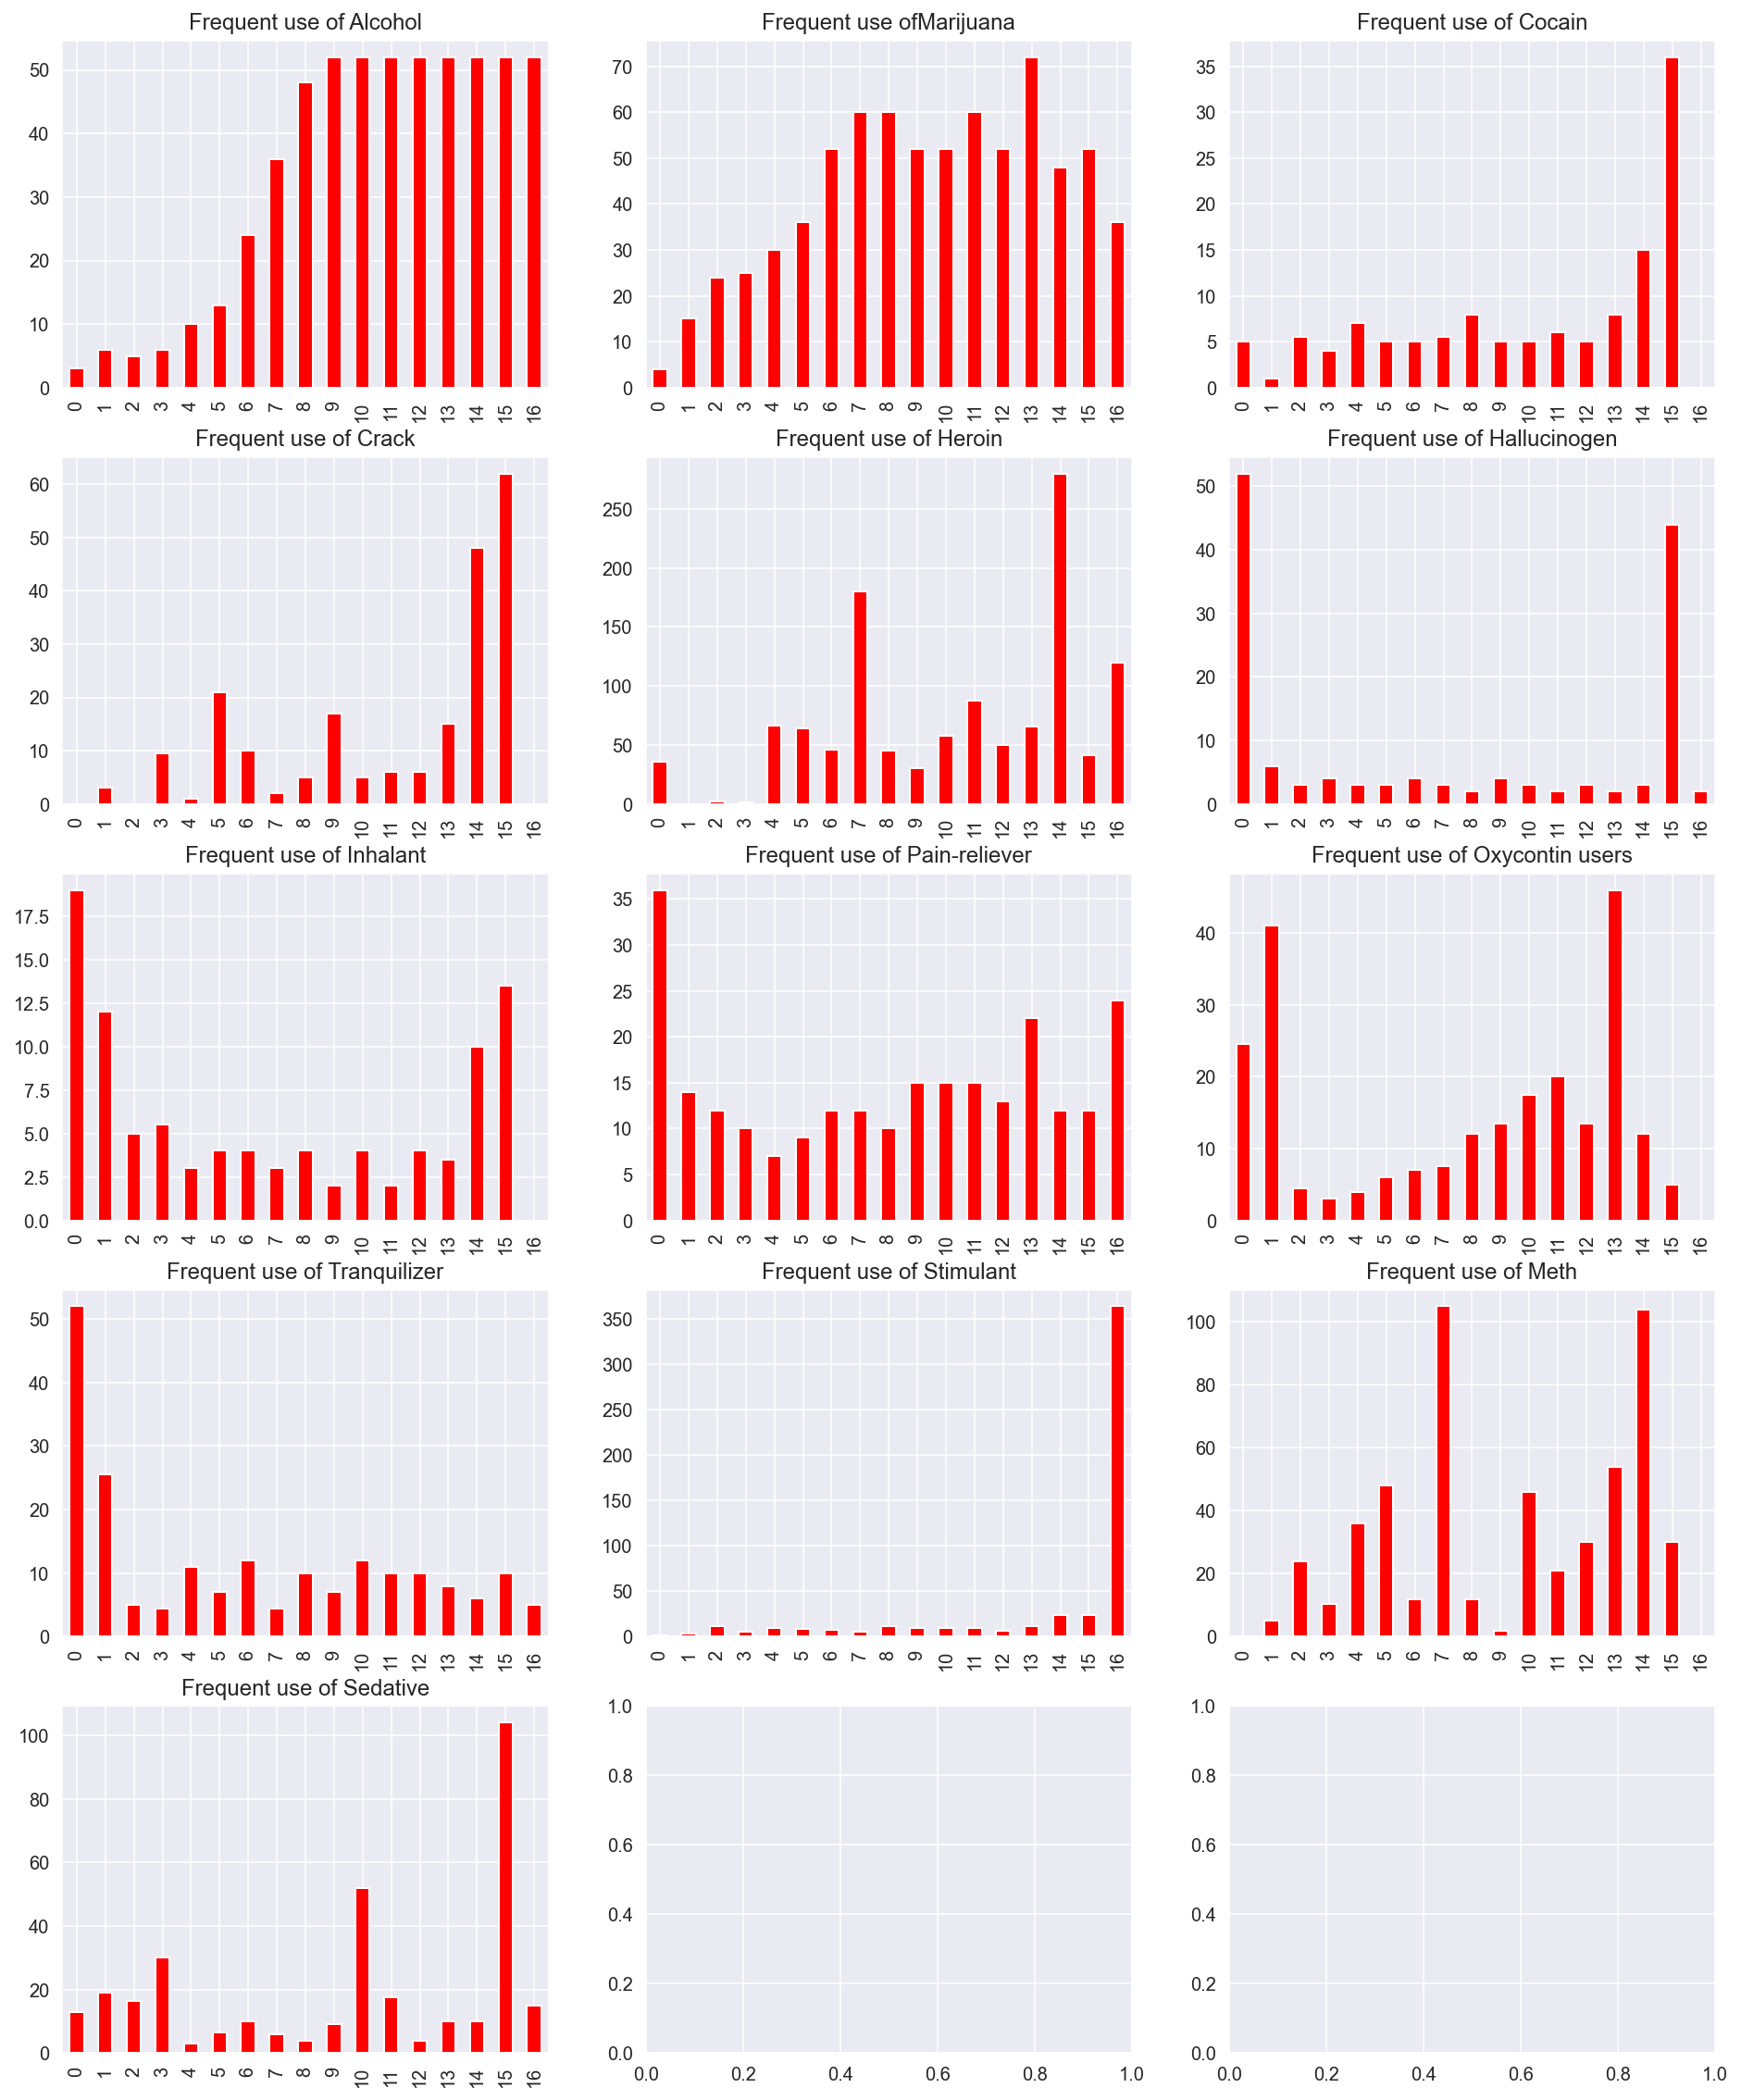

In [50]:
fig, ax = plt.subplots(5,3, figsize=(16,20))
drug_freq['alcohol-frequency'].plot(kind='bar', color='r', ax=ax[0][0], title='Frequent use of Alcohol')
drug_freq['marijuana-frequency'].plot(kind='bar', color='r', ax=ax[0][1], title='Frequent use ofMarijuana')
drug_freq['cocaine-frequency'].plot(kind='bar', color='r', ax=ax[0][2], title='Frequent use of Cocain')
drug_freq['crack-frequency'].plot(kind='bar', color='r', ax=ax[1][0], title='Frequent use of Crack')
drug_freq['heroin-frequency'].plot(kind='bar', color='r', ax=ax[1][1], title='Frequent use of Heroin')
drug_freq['hallucinogen-frequency'].plot(kind='bar', color='r', ax=ax[1][2], title='Frequent use of Hallucinogen')
drug_freq['inhalant-frequency'].plot(kind='bar', color='r', ax=ax[2][0], title='Frequent use of Inhalant')
drug_freq['pain-releiver-frequency'].plot(kind='bar', color='r', ax=ax[2][1], title='Frequent use of Pain-reliever')
drug_freq['oxycontin-frequency'].plot(kind='bar', color='r', ax=ax[2][2], title='Frequent use of Oxycontin users')
drug_freq['tranquilizer-frequency'].plot(kind='bar', color='r', ax=ax[3][0], title='Frequent use of Tranquilizer')
drug_freq['stimulant-frequency'].plot(kind='bar', color='r', ax=ax[3][1], title='Frequent use of Stimulant')
drug_freq['meth-frequency'].plot(kind='bar', color='r', ax=ax[3][2], title='Frequent use of Meth')
drug_freq['sedative-frequency'].plot(kind='bar', color='r', ax=ax[4][0], title='Frequent use of Sedative')

### 🔎Observation
**cocain, crack, heroin, hallucinogen, and stimulant** may be more addictive than other drugs since the frequency is very high for their users. People who use have a tendancy to repeat using them

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

#### Let's explore...🌪

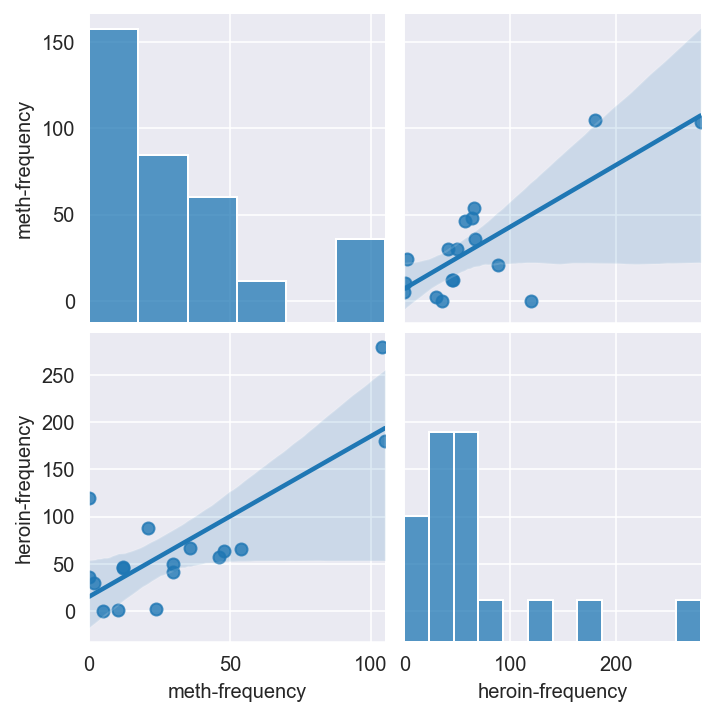

In [51]:
sns.pairplot(drug_freq[['meth-frequency','heroin-frequency']], kind='reg')

### 🕵Determining a testable hypothesis
From 7.2, I found that the frequency of uses in 'meth' x 'heroin' is positively correlated. Both are known to be very destructive and addicitive drugs. I want to use sample t-test to test whether there is a possibility that their correlations can be more positive than what this sample is shown. 

- H0: p = .78
- Ha: p > .78
- let alpha to be .1
- Note: this is the two tailed test

In [52]:
import scipy.stats as stats

In [53]:
sample1 = drug_freq['meth-frequency']
sample2 = drug_freq['heroin-frequency']

stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-1.988850489549016, pvalue=0.05532529052387567)

Since p-value < alpha, we have a sufficient reason to reject H0
Therefore, the proportion that the use of meth and heroin would be different from what we observed from the sample.

** Question and deliverables**


...

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.